In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

# CSP vs RMSD (for a certain mutant)

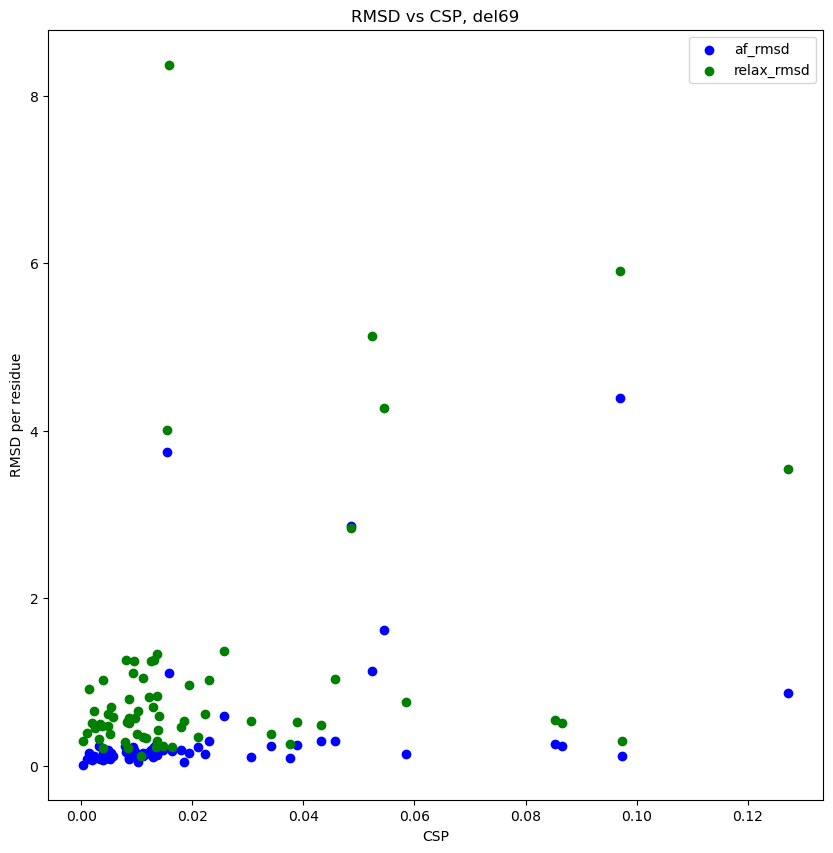

In [12]:
# plot csp vs rmsd
# for a certain mutant

df = pd.read_csv("perResidue_info/del69.csv")
df = df[df['CSP'] != 0]

plt.figure(figsize = (10, 10))
plt.scatter(df['CSP'], df['af_rmsd'], color = 'blue', label = 'af_rmsd')
plt.scatter(df['CSP'], df['relax_rmsd'], color = 'green', label = 'relax_rmsd')

plt.xlabel('CSP')
plt.ylabel('RMSD per residue')
plt.title('RMSD vs CSP, del69')
plt.legend()

plt.show()

# CSP vs abs(ddG) (for a certain mutant)

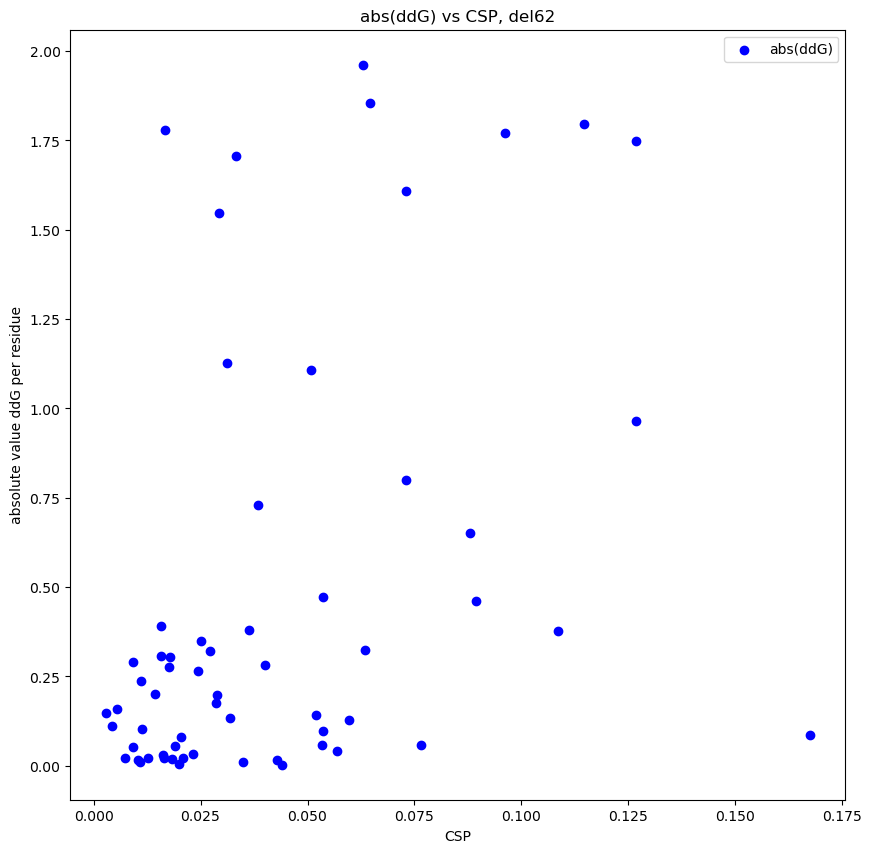

In [15]:
# plot csp vs abs(ddG)
# for a certain mutant

df = pd.read_csv("perResidue_info/del62.csv")
df = df[df['CSP'] != 0]

plt.figure(figsize = (10, 10))
plt.scatter(df['CSP'], df['absddG'], color = 'blue', label = 'abs(ddG)')

plt.xlabel('CSP')
plt.ylabel('absolute value ddG per residue')
plt.title('abs(ddG) vs CSP, del62')
plt.legend()

plt.show()

# abs(ddG) vs RMSD (for a certain mutant)

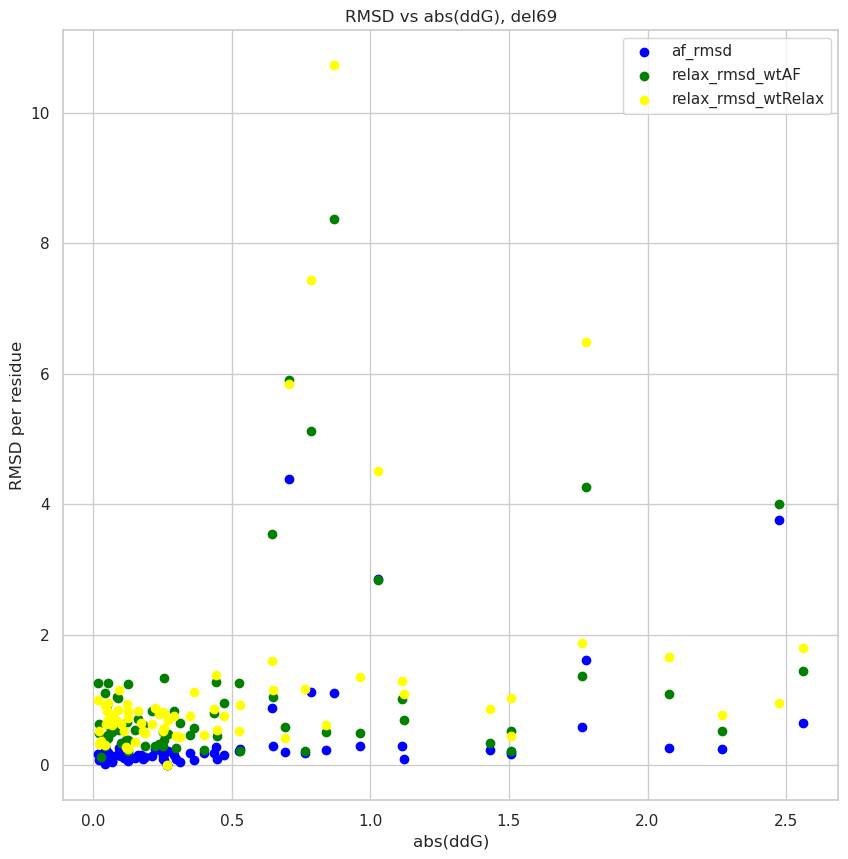

In [32]:
# plot abs(ddG) vs rmsd
# for a certain mutant

df = pd.read_csv("perResidue_info/del69.csv")

plt.figure(figsize = (10, 10))
plt.scatter(df['absddG'], df['af_rmsd'], color = 'blue', label = 'af_rmsd')
plt.scatter(df['absddG'], df['relax_rmsd_wtAF'], color = 'green', label = 'relax_rmsd_wtAF')
plt.scatter(df['absddG'], df['relax_rmsd_wtRelax'], color = 'yellow', label = 'relax_rmsd_wtRelax')

plt.xlabel('abs(ddG)')
plt.ylabel('RMSD per residue')
plt.title('RMSD vs abs(ddG), del69')
plt.legend()

plt.show()

# swarmplot

## swarmplot for rmsd

In [2]:
# read correlation coefficient csv files

pearson_df = pd.read_csv("correlation_csv/pearson.csv")
kendall_df = pd.read_csv("correlation_csv/kendall.csv")
spearman_df = pd.read_csv("correlation_csv/spearman.csv")

/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


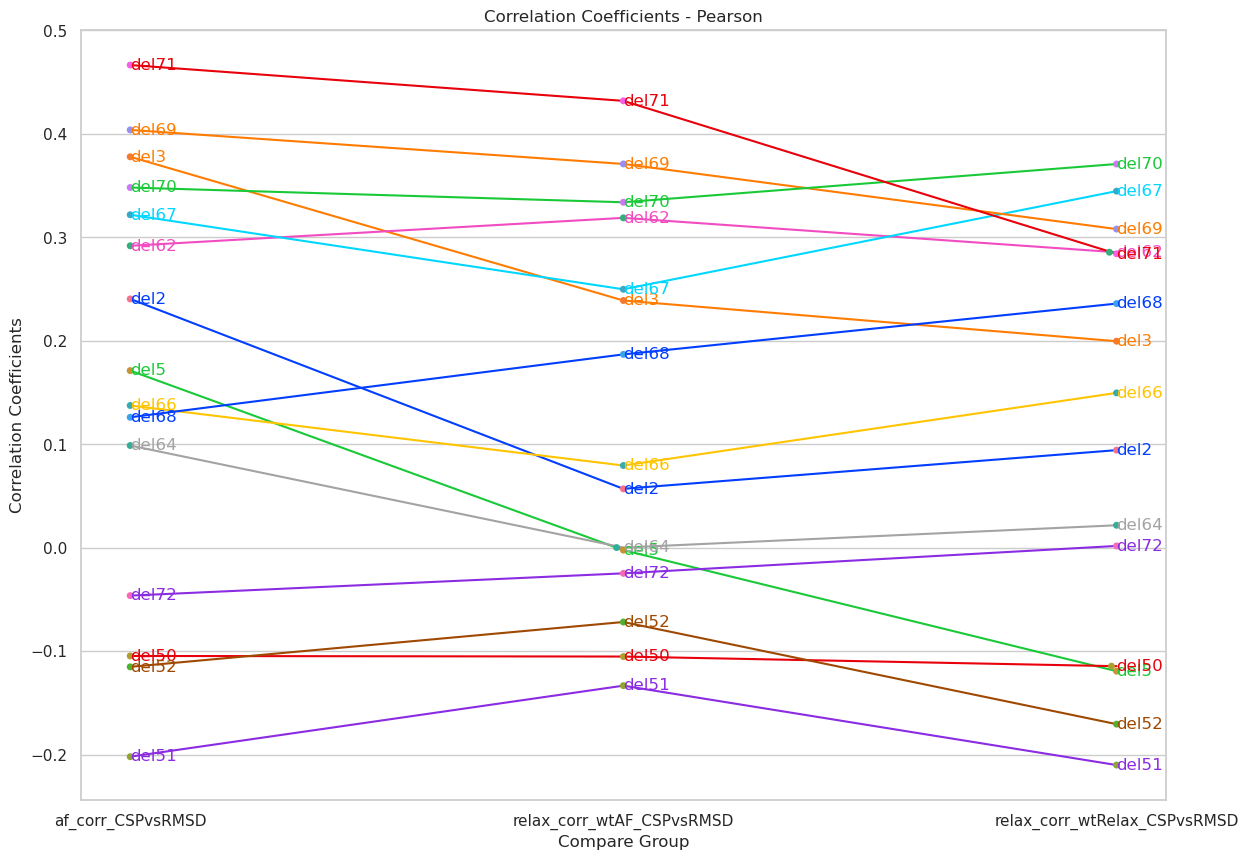

In [11]:
# swarmplot for rmsd, pearson
df_melted = pearson_df.melt(id_vars = 'del_names', value_vars = ['af_corr_CSPvsRMSD', 'relax_corr_wtAF_CSPvsRMSD', 'relax_corr_wtRelax_CSPvsRMSD'], var_name = 'Groups', value_name = 'Values')

# plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (14, 10))
sns.swarmplot(x = 'Groups', y = 'Values', hue = 'del_names', data = df_melted)

colors = sns.color_palette('bright', n_colors = len(pearson_df['del_names']))

for i, id in enumerate(pearson_df['del_names']):
    subset = df_melted[df_melted['del_names'] == id]
    plt.plot(subset['Groups'], subset['Values'], color = colors[i])
    for group, value in zip(subset['Groups'], subset['Values']):
        plt.text(group, value, str(id), color = colors[i], horizontalalignment = 'left', size = 'medium', verticalalignment = 'center')

plt.legend([], [], frameon = False)
plt.title('Correlation Coefficients - Pearson')
plt.xlabel('Compare Group')
plt.ylabel('Correlation Coefficients')
plt.show()

/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


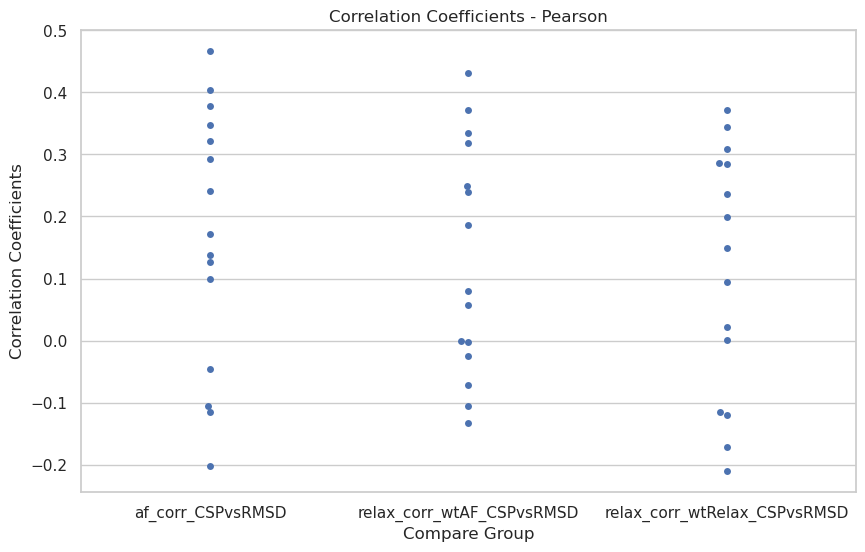

In [40]:
# swarmplot for rmsd, pearson

# prepare the data
rmsd_df = pearson_df[['af_corr_CSPvsRMSD', 'relax_corr_wtAF_CSPvsRMSD', 'relax_corr_wtRelax_CSPvsRMSD']]
rmsd_df_melted = rmsd_df.melt(var_name = 'Columns', value_name = 'Values')

sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 6))
sns.swarmplot(x = 'Columns', y = 'Values', data = rmsd_df_melted)

plt.title('Correlation Coefficients - Pearson')
plt.xlabel('Compare Group')
plt.ylabel('Correlation Coefficients')
plt.show()

/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


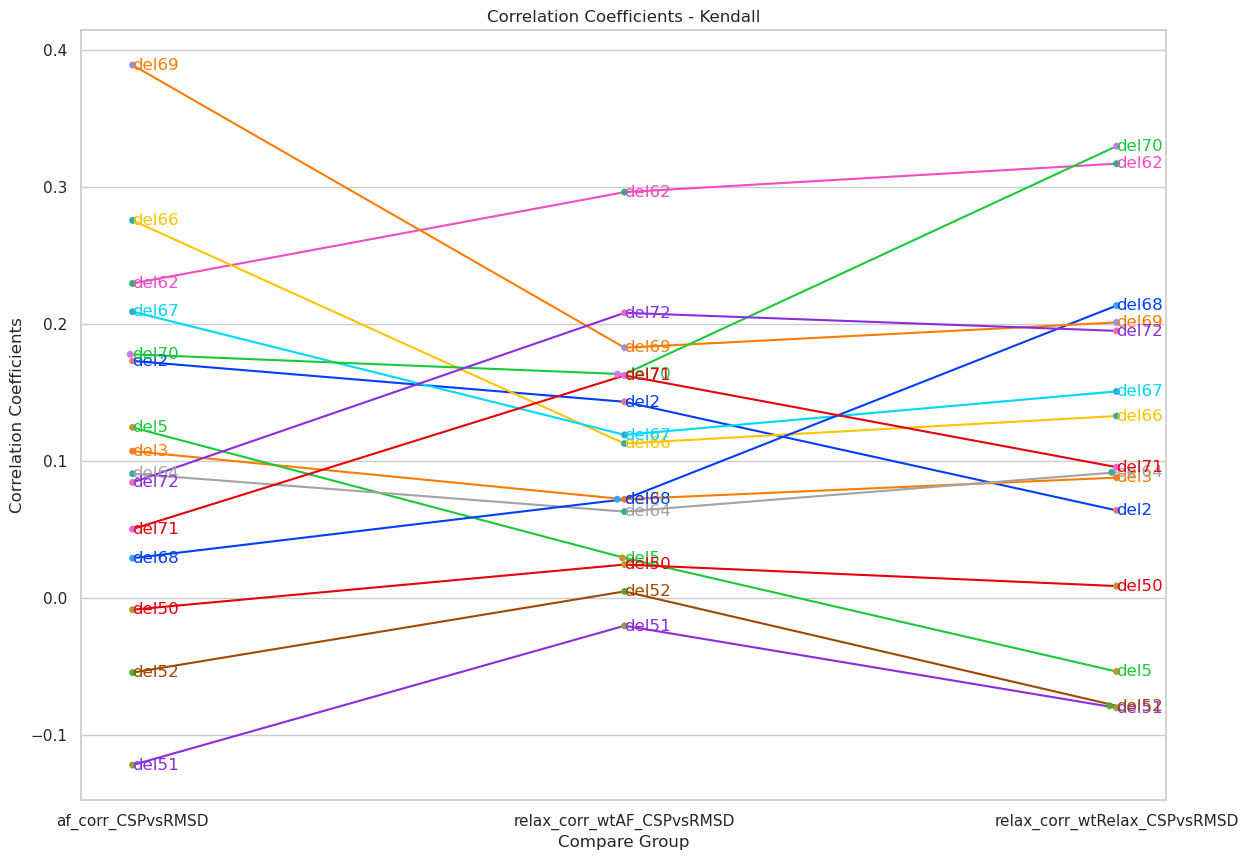

In [12]:
# swarmplot for rmsd, kendall
df_melted = kendall_df.melt(id_vars = 'del_names', value_vars = ['af_corr_CSPvsRMSD', 'relax_corr_wtAF_CSPvsRMSD', 'relax_corr_wtRelax_CSPvsRMSD'], var_name = 'Groups', value_name = 'Values')

# plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (14, 10))
sns.swarmplot(x = 'Groups', y = 'Values', hue = 'del_names', data = df_melted)

colors = sns.color_palette('bright', n_colors = len(pearson_df['del_names']))

for i, id in enumerate(pearson_df['del_names']):
    subset = df_melted[df_melted['del_names'] == id]
    plt.plot(subset['Groups'], subset['Values'], color = colors[i])
    for group, value in zip(subset['Groups'], subset['Values']):
        plt.text(group, value, str(id), color = colors[i], horizontalalignment = 'left', size = 'medium', verticalalignment = 'center')

plt.legend([], [], frameon = False)
plt.title('Correlation Coefficients - Kendall')
plt.xlabel('Compare Group')
plt.ylabel('Correlation Coefficients')
plt.show()

/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


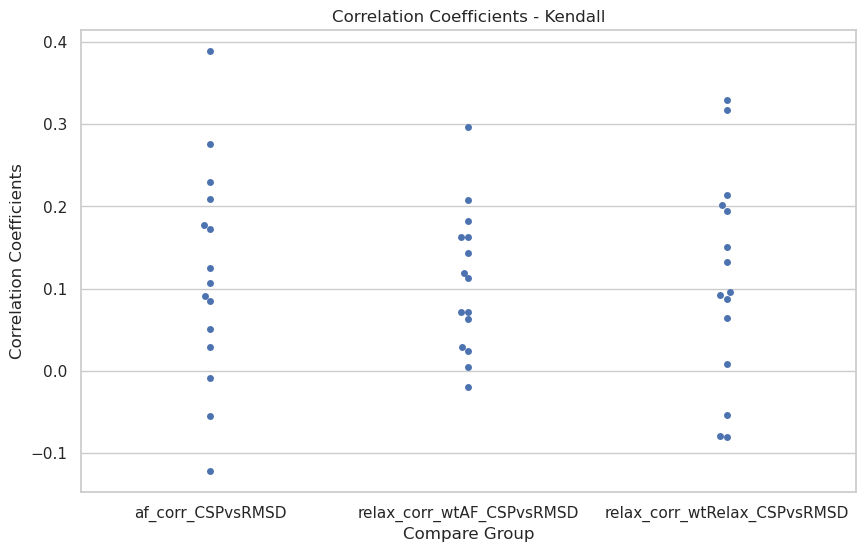

In [41]:
# swarmplot for rmsd, kendall

# prepare the data
rmsd_df = kendall_df[['af_corr_CSPvsRMSD', 'relax_corr_wtAF_CSPvsRMSD', 'relax_corr_wtRelax_CSPvsRMSD']]
rmsd_df_melted = rmsd_df.melt(var_name = 'Columns', value_name = 'Values')

sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 6))
sns.swarmplot(x = 'Columns', y = 'Values', data = rmsd_df_melted)

plt.title('Correlation Coefficients - Kendall')
plt.xlabel('Compare Group')
plt.ylabel('Correlation Coefficients')
plt.show()

/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


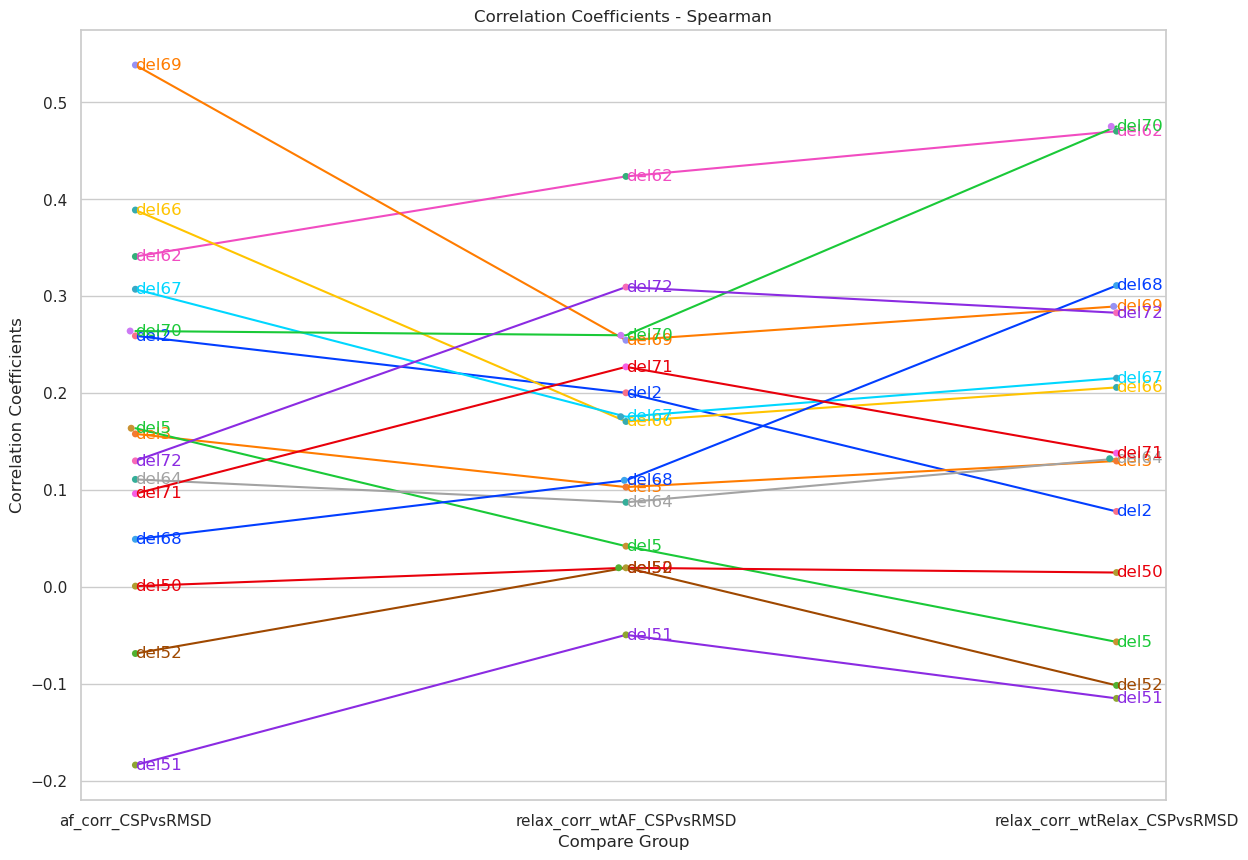

In [13]:
# swarmplot for rmsd, spearman
df_melted = spearman_df.melt(id_vars = 'del_names', value_vars = ['af_corr_CSPvsRMSD', 'relax_corr_wtAF_CSPvsRMSD', 'relax_corr_wtRelax_CSPvsRMSD'], var_name = 'Groups', value_name = 'Values')

# plot
sns.set(style = 'whitegrid')
plt.figure(figsize = (14, 10))
sns.swarmplot(x = 'Groups', y = 'Values', hue = 'del_names', data = df_melted)

colors = sns.color_palette('bright', n_colors = len(pearson_df['del_names']))

for i, id in enumerate(pearson_df['del_names']):
    subset = df_melted[df_melted['del_names'] == id]
    plt.plot(subset['Groups'], subset['Values'], color = colors[i])
    for group, value in zip(subset['Groups'], subset['Values']):
        plt.text(group, value, str(id), color = colors[i], horizontalalignment = 'left', size = 'medium', verticalalignment = 'center')

plt.legend([], [], frameon = False)
plt.title('Correlation Coefficients - Spearman')
plt.xlabel('Compare Group')
plt.ylabel('Correlation Coefficients')
plt.show()

/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


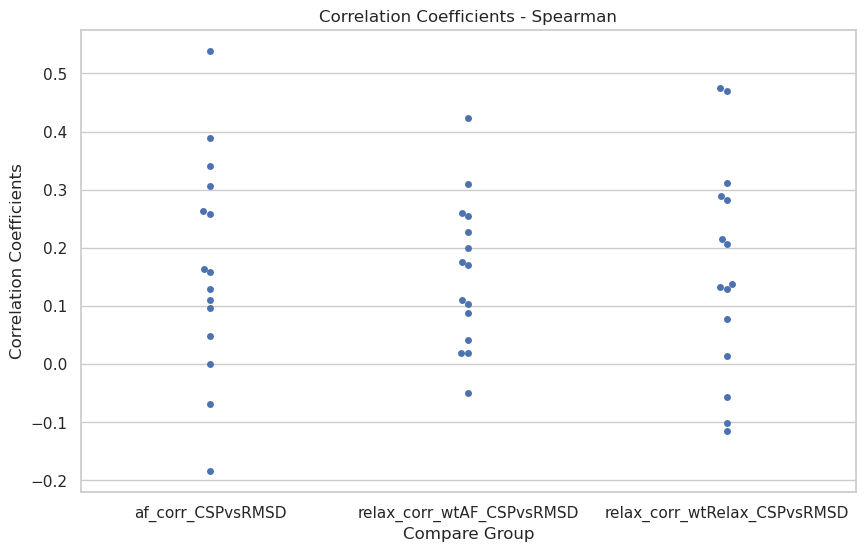

In [42]:
# swarmplot for rmsd, spearman

# prepare the data
rmsd_df = spearman_df[['af_corr_CSPvsRMSD', 'relax_corr_wtAF_CSPvsRMSD', 'relax_corr_wtRelax_CSPvsRMSD']]
rmsd_df_melted = rmsd_df.melt(var_name = 'Columns', value_name = 'Values')

sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 6))
sns.swarmplot(x = 'Columns', y = 'Values', data = rmsd_df_melted)

plt.title('Correlation Coefficients - Spearman')
plt.xlabel('Compare Group')
plt.ylabel('Correlation Coefficients')
plt.show()

## swarmplot for ddG

/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scicore/home/zavolan/zhu0006/miniforge3/envs/myenv2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


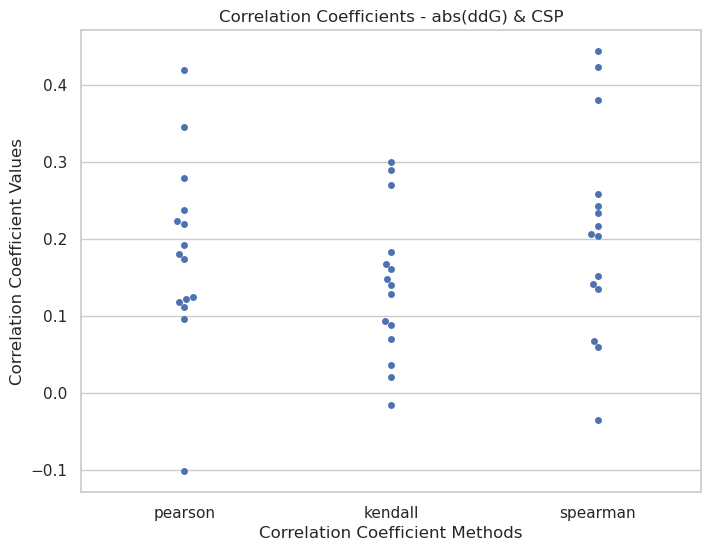

In [43]:
# swarmplot for ddG, three kinds of corr

# initialize dataframe
ddG_df = pearson_df[['del_names']]

# add three corr to it
ddG_df['pearson'] = pearson_df['relax_corr_CSPvsddG']
ddG_df['kendall'] = kendall_df['relax_corr_CSPvsddG']
ddG_df['spearman'] = spearman_df['relax_corr_CSPvsddG']

ddG_df_subset = ddG_df[['pearson', 'kendall', 'spearman']]
ddG_df_melted = ddG_df_subset.melt(var_name = 'Columns', value_name = 'Values')

sns.set(style = 'whitegrid')
plt.figure(figsize = (8, 6))
sns.swarmplot(x = 'Columns', y = 'Values', data = ddG_df_melted)

plt.title('Correlation Coefficients - abs(ddG) & CSP')
plt.xlabel('Correlation Coefficient Methods')
plt.ylabel('Correlation Coefficient Values')
plt.show()

# boxplot

In [56]:
# read the data

pearson_absddGvsRMSD_df = pd.read_csv("correlation_csv/pearson_absddGvsRMSD.csv")
kendall_absddGvsRMSD_df = pd.read_csv("correlation_csv/kendall_absddGvsRMSD.csv")
spearman_absddGvsRMSD_df = pd.read_csv("correlation_csv/spearman_absddGvsRMSD.csv")

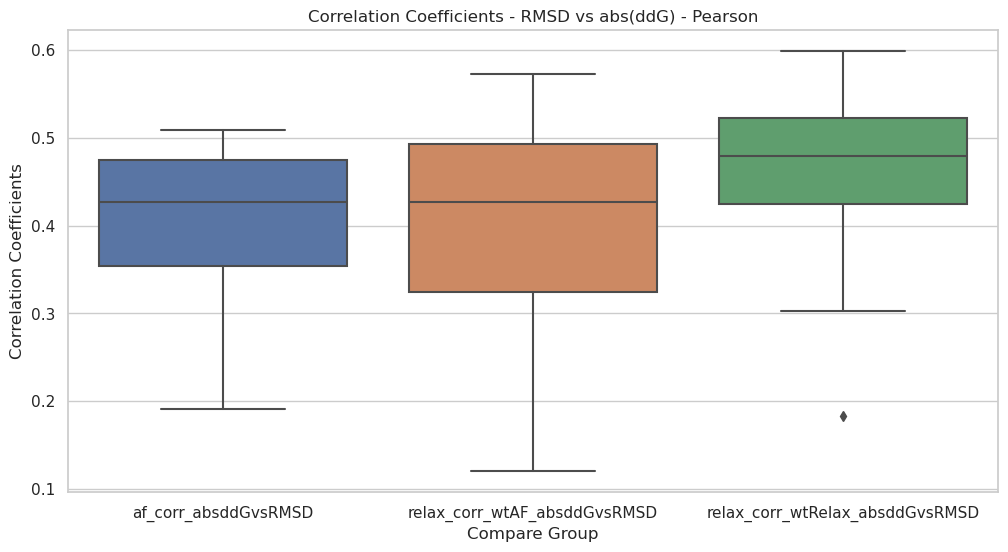

In [57]:
# Pearson
# prepare the data
rmsd_df = pearson_absddGvsRMSD_df[['af_corr_absddGvsRMSD', 'relax_corr_wtAF_absddGvsRMSD', 'relax_corr_wtRelax_absddGvsRMSD']]
rmsd_df_melted = rmsd_df.melt(var_name = 'Columns', value_name = 'Values')

sns.set(style = 'whitegrid')
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Columns', y = 'Values', data = rmsd_df_melted)

plt.title('Correlation Coefficients - RMSD vs abs(ddG) - Pearson')
plt.xlabel('Compare Group')
plt.ylabel('Correlation Coefficients')
plt.show()

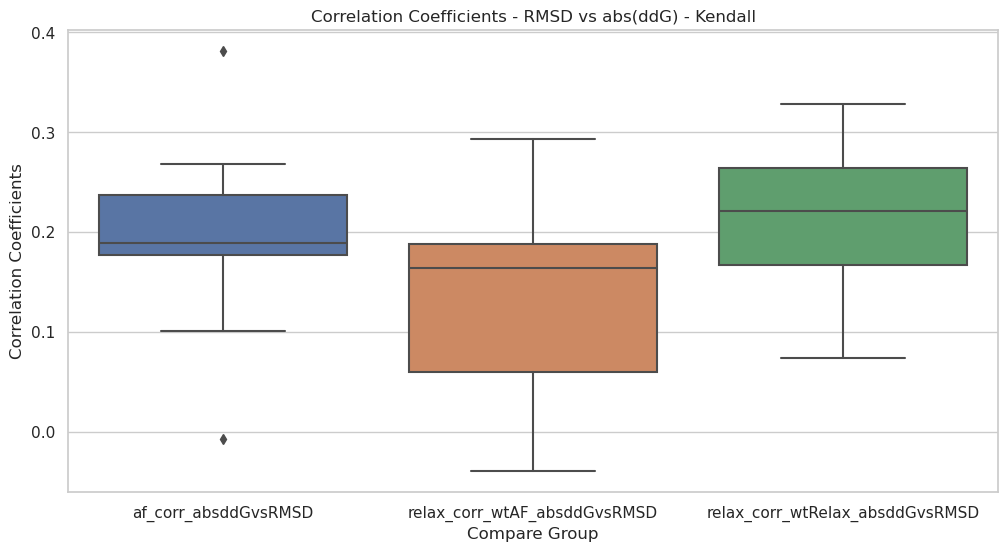

In [58]:
# Kendall
# prepare the data
rmsd_df = kendall_absddGvsRMSD_df[['af_corr_absddGvsRMSD', 'relax_corr_wtAF_absddGvsRMSD', 'relax_corr_wtRelax_absddGvsRMSD']]
rmsd_df_melted = rmsd_df.melt(var_name = 'Columns', value_name = 'Values')

sns.set(style = 'whitegrid')
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Columns', y = 'Values', data = rmsd_df_melted)

plt.title('Correlation Coefficients - RMSD vs abs(ddG) - Kendall')
plt.xlabel('Compare Group')
plt.ylabel('Correlation Coefficients')
plt.show()

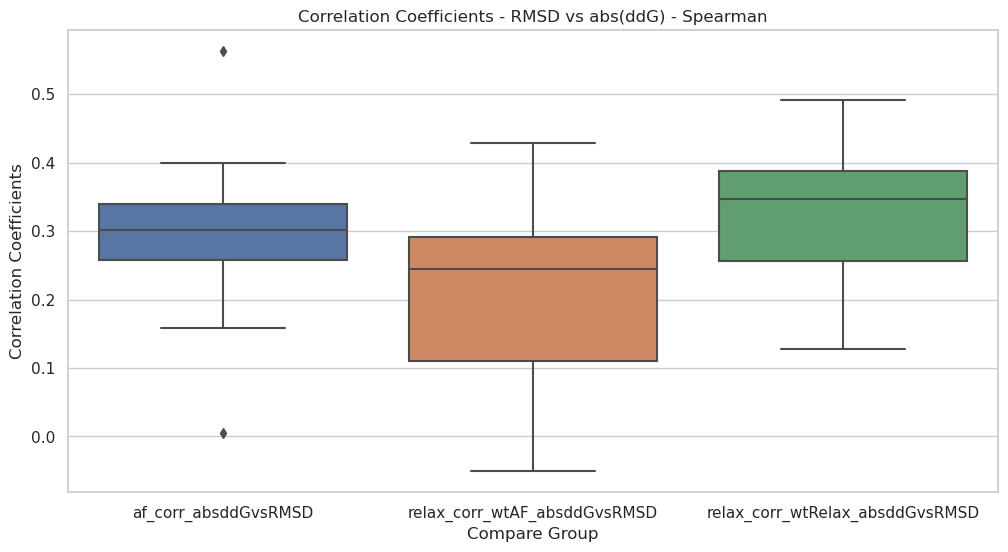

In [59]:
# Spearman
# prepare the data
rmsd_df = spearman_absddGvsRMSD_df[['af_corr_absddGvsRMSD', 'relax_corr_wtAF_absddGvsRMSD', 'relax_corr_wtRelax_absddGvsRMSD']]
rmsd_df_melted = rmsd_df.melt(var_name = 'Columns', value_name = 'Values')

sns.set(style = 'whitegrid')
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Columns', y = 'Values', data = rmsd_df_melted)

plt.title('Correlation Coefficients - RMSD vs abs(ddG) - Spearman')
plt.xlabel('Compare Group')
plt.ylabel('Correlation Coefficients')
plt.show()

# correlation coefficients vs others

In [14]:
# read correlation coefficient csv files
# read plddt and deltaG csv file

pearson_df = pd.read_csv("correlation_csv/pearson.csv")
kendall_df = pd.read_csv("correlation_csv/kendall.csv")
spearman_df = pd.read_csv("correlation_csv/spearman.csv")
scores_df = pd.read_csv("correlation_csv/scores.csv")

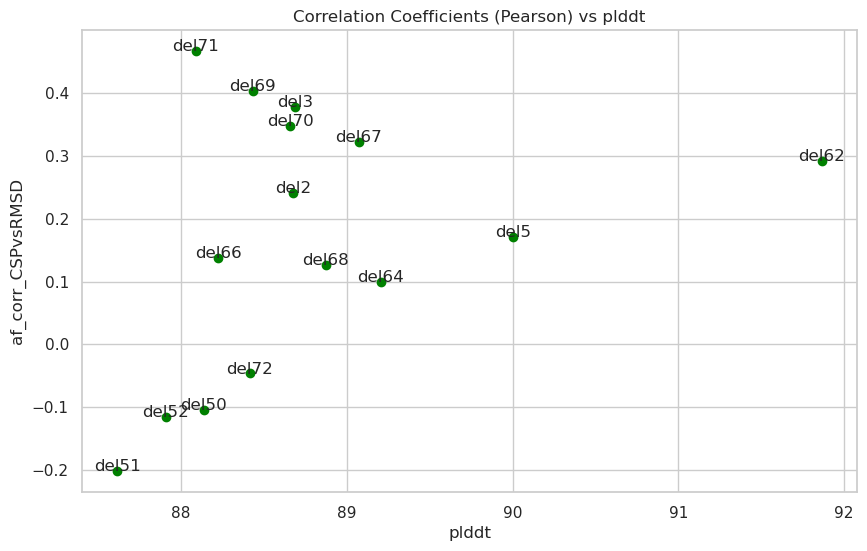

In [21]:
# scatter plot coef vs plddt scores, pearson

df_plddt = pd.merge(pearson_df, scores_df, on = "del_names", how = "inner")

plt.figure(figsize = (10, 6))
plt.scatter(df_plddt['plddt'], df_plddt['af_corr_CSPvsRMSD'], color = 'green')

for i in range(len(df_plddt)):
    plt.annotate(df_plddt['del_names'][i], (df_plddt['plddt'][i], df_plddt['af_corr_CSPvsRMSD'][i]), ha = 'center')

plt.title('Correlation Coefficients (Pearson) vs plddt')
plt.xlabel('plddt')
plt.ylabel('af_corr_CSPvsRMSD')
plt.show()

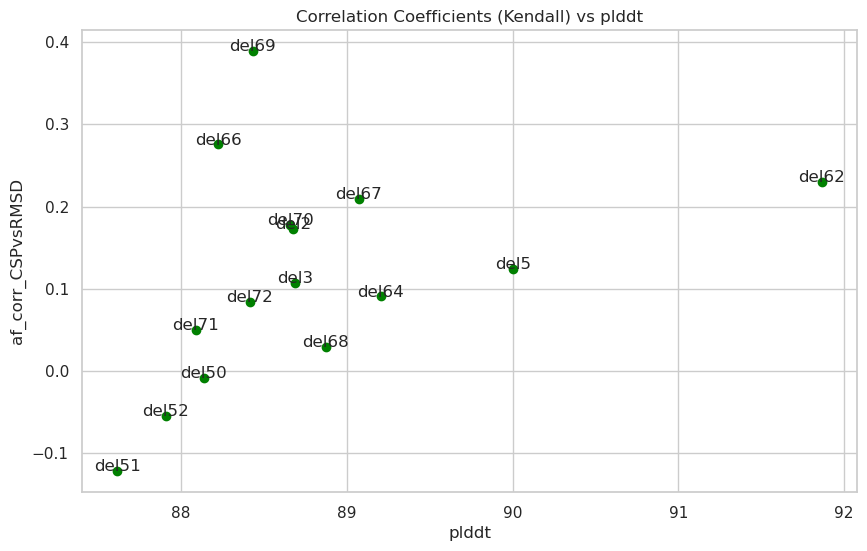

In [22]:
# scatter plot coef vs plddt scores, kendall

df_plddt = pd.merge(kendall_df, scores_df, on = "del_names", how = "inner")

plt.figure(figsize = (10, 6))
plt.scatter(df_plddt['plddt'], df_plddt['af_corr_CSPvsRMSD'], color = 'green')

for i in range(len(df_plddt)):
    plt.annotate(df_plddt['del_names'][i], (df_plddt['plddt'][i], df_plddt['af_corr_CSPvsRMSD'][i]), ha = 'center')

plt.title('Correlation Coefficients (Kendall) vs plddt')
plt.xlabel('plddt')
plt.ylabel('af_corr_CSPvsRMSD')
plt.show()

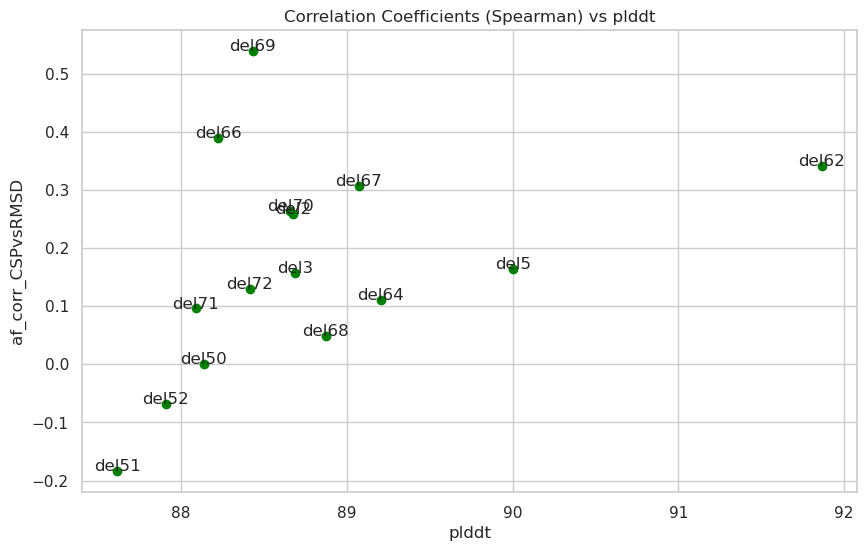

In [23]:
# scatter plot coef vs plddt scores, spearman

df_plddt = pd.merge(spearman_df, scores_df, on = "del_names", how = "inner")

plt.figure(figsize = (10, 6))
plt.scatter(df_plddt['plddt'], df_plddt['af_corr_CSPvsRMSD'], color = 'green')

for i in range(len(df_plddt)):
    plt.annotate(df_plddt['del_names'][i], (df_plddt['plddt'][i], df_plddt['af_corr_CSPvsRMSD'][i]), ha = 'center')

plt.title('Correlation Coefficients (Spearman) vs plddt')
plt.xlabel('plddt')
plt.ylabel('af_corr_CSPvsRMSD')
plt.show()

In [ ]:
# I use the delta G score from ranked_3_0006 for wildtype
# The value is -198.080

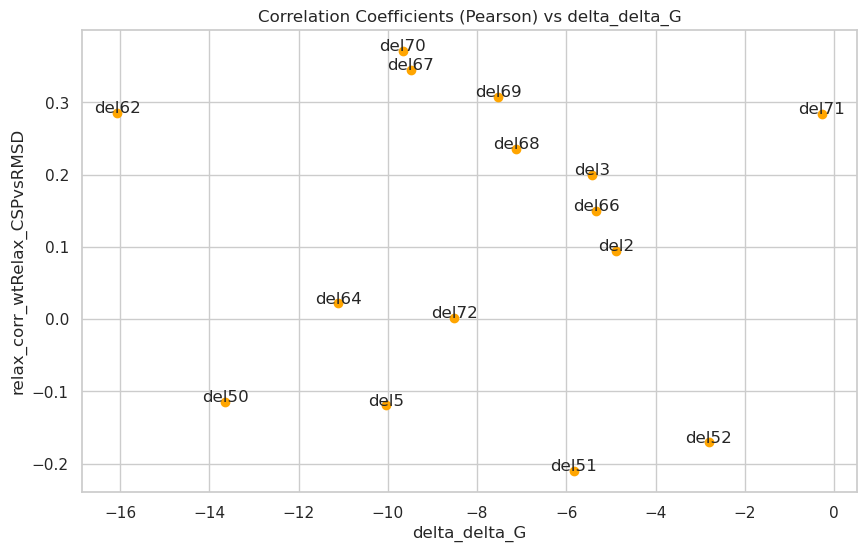

In [34]:
# scatter plot coef vs delta_delta_G scores, pearson

df_deltaG = pd.merge(pearson_df, scores_df, on = "del_names", how = "inner")

plt.figure(figsize = (10, 6))
plt.scatter(df_deltaG['deltaG']+198.080, df_deltaG['relax_corr_wtRelax_CSPvsRMSD'], color = 'orange')

for i in range(len(df_deltaG)):
    plt.annotate(df_deltaG['del_names'][i], (df_deltaG['deltaG'][i]+198.080, df_deltaG['relax_corr_wtRelax_CSPvsRMSD'][i]), ha = 'center')

plt.title('Correlation Coefficients (Pearson) vs delta_delta_G')
plt.xlabel('delta_delta_G')
plt.ylabel('relax_corr_wtRelax_CSPvsRMSD')
plt.show()

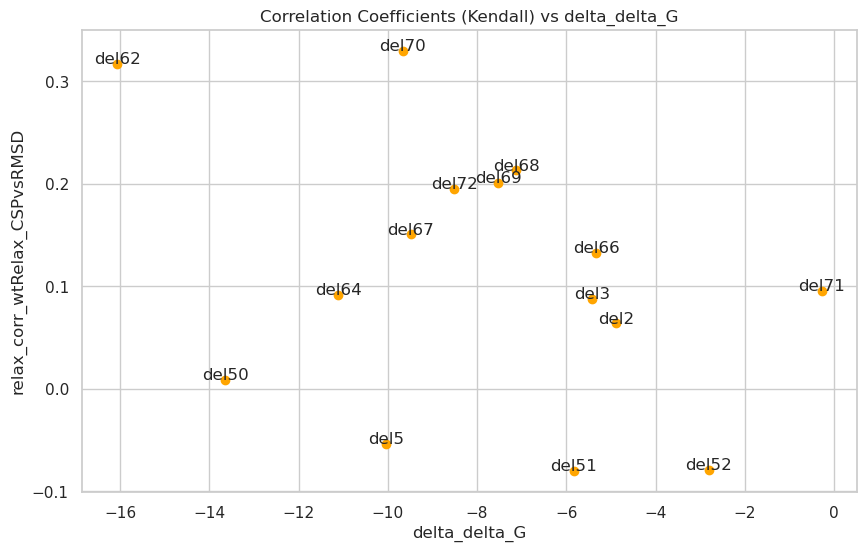

In [35]:
# scatter plot coef vs deltaG scores, kendall

df_deltaG = pd.merge(kendall_df, scores_df, on = "del_names", how = "inner")

plt.figure(figsize = (10, 6))
plt.scatter(df_deltaG['deltaG']+198.080, df_deltaG['relax_corr_wtRelax_CSPvsRMSD'], color = 'orange')

for i in range(len(df_deltaG)):
    plt.annotate(df_deltaG['del_names'][i], (df_deltaG['deltaG'][i]+198.080, df_deltaG['relax_corr_wtRelax_CSPvsRMSD'][i]), ha = 'center')

plt.title('Correlation Coefficients (Kendall) vs delta_delta_G')
plt.xlabel('delta_delta_G')
plt.ylabel('relax_corr_wtRelax_CSPvsRMSD')
plt.show()

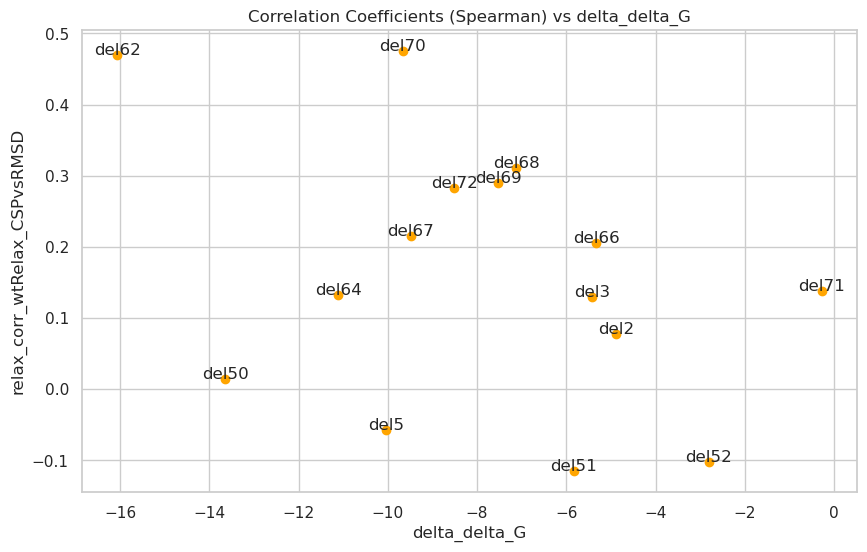

In [36]:
# scatter plot coef vs deltaG scores, spearman

df_deltaG = pd.merge(spearman_df, scores_df, on = "del_names", how = "inner")

plt.figure(figsize = (10, 6))
plt.scatter(df_deltaG['deltaG']+198.080, df_deltaG['relax_corr_wtRelax_CSPvsRMSD'], color = 'orange')

for i in range(len(df_deltaG)):
    plt.annotate(df_deltaG['del_names'][i], (df_deltaG['deltaG'][i]+198.080, df_deltaG['relax_corr_wtRelax_CSPvsRMSD'][i]), ha = 'center')

plt.title('Correlation Coefficients (Spearman) vs delta_delta_G')
plt.xlabel('delta_delta_G')
plt.ylabel('relax_corr_wtRelax_CSPvsRMSD')
plt.show()